# Berline Airbnb Dataset
- This data has been collected from this website http://insideairbnb.com/get-the-data/.
- Audience: Both Potential hosts looking to set competitive prices and travllers seeking for an apartment with a resonable at a popular neighbourhood

## Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation
- Load in all csv files for comprehensive analysis

In [ ]:
#data1 = pd.read_csv('./data/Berlin_listings.csv', delimiter=',')
#data2 = pd.read_csv('./data/Berlin_neighbourhoods.csv', delimiter=',')
#data3 = pd.read_csv('./data/Berlin_reviews.csv', delimiter=',')
#data = pd.concat([data1, data2, data3], ignore_index=True)
#data.head(2)

In [2]:
data = pd.read_csv('./data/Berlin_listings.csv', delimiter=',')
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,148,2023-05-25,0.85,1,123,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.08,1,137,0,03/Z/RA/003410-18


In [3]:
# Inspect the "name" column
data.name.iloc[1]

'Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 beds · 2.5 baths'

**Insights**: New features will be created at the end, extracting other helpful information from the 'name' column. Majority of apartments do not have information about the number of bathrooms.

In [4]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,148,2023-05-25,0.85,1,123,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.08,1,137,0,03/Z/RA/003410-18


**Insights**: Now when we look at the data, you may observe rating, number of bedrooms, number of beds, and number of baths are added.

## Check data
- data type
- number of rows , number of columns
- unique values in each column

In [5]:
print('\dtype:', data.info())
print('\nRows : ',data.shape[0])
print('\nColumns :', data.shape[1])
print('\nColumns:',data.columns.to_list())
print(' \nUnique:\n',data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13134 entries, 0 to 13133
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13134 non-null  int64  
 1   name                            13134 non-null  object 
 2   host_id                         13134 non-null  int64  
 3   host_name                       13125 non-null  object 
 4   neighbourhood_group             13134 non-null  object 
 5   neighbourhood                   13134 non-null  object 
 6   latitude                        13134 non-null  float64
 7   longitude                       13134 non-null  float64
 8   room_type                       13134 non-null  object 
 9   price                           13134 non-null  int64  
 10  minimum_nights                  13134 non-null  int64  
 11  number_of_reviews               13134 non-null  int64  
 12  last_review                     

The dataset

## Data Cleaning
- Drop Columns with missing values
- Why? --> Because incomplete data could lead to unreliable and inaccurate reults.


In [6]:
# Check NaN values in each column.
for column in data.columns:
    print(column, data[column].isnull().sum())

id 0
name 0
host_id 0
host_name 9
neighbourhood_group 0
neighbourhood 0
latitude 0
longitude 0
room_type 0
price 0
minimum_nights 0
number_of_reviews 0
last_review 2756
reviews_per_month 2756
calculated_host_listings_count 0
availability_365 0
number_of_reviews_ltm 0
license 5122


In [7]:
# Drop a row if there is a NaN in ANY column
print(data.isna().sum())
data.dropna(inplace=False)
data.dropna()

id                                   0
name                                 0
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2756
reviews_per_month                 2756
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5122
dtype: int64


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534710,13.418100,Entire home/apt,83,63,148,2023-05-25,0.85,1,123,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.532690,13.418050,Entire home/apt,180,6,8,2020-01-04,0.08,1,137,0,03/Z/RA/003410-18
4,30295,Rental unit in Berlin · ★4.79 · 2 bedrooms · 4...,485838,Michele,Pankow,Helmholtzplatz,52.545960,13.422910,Entire home/apt,126,4,401,2023-09-12,2.53,4,280,41,First name and Last name: Michele Fossi (mich...
6,20858,Loft in Berlin · ★4.49 · 2 bedrooms · 2 beds ·...,71331,Marc,Pankow,Prenzlauer Berg Südwest,52.537110,13.408880,Entire home/apt,179,3,116,2023-08-14,0.87,1,134,17,03/Z/RA/006926-22
9,37004,Rental unit in Berlin · ★4.71 · 1 bedroom · 1 ...,159734,Bernd,Tempelhof - Schöneberg,Schöneberg-Nord,52.493760,13.364080,Private room,60,8,34,2023-09-03,0.21,1,295,7,07/Z/AZ/005813-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12985,973029190716153796,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,40001934,Ali,Tempelhof - Schöneberg,Schöneberg-Nord,52.503339,13.347066,Entire home/apt,89,2,2,2023-09-15,2.00,1,7,2,First name and Last name: Ali Hashemi <br/> Co...
12995,970207500901195892,Rental unit in Berlin · ★5.0 · 1 bedroom · 1 b...,514050451,Joel,Mitte,Alexanderplatz,52.530322,13.383088,Entire home/apt,281,1,3,2023-09-11,3.00,2,261,3,03/Z/RA/007595-22
13017,970764866818900088,Rental unit in Berlin · ★New · 2 bedrooms · 2 ...,534950301,Maia,Mitte,Alexanderplatz,52.532988,13.379203,Entire home/apt,263,3,1,2023-09-04,1.00,1,253,1,Legal entity name and Legal form: De Gambs Ass...
13043,971025812367929470,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,535016045,Sikander,Mitte,Tiergarten Süd,52.506535,13.346045,Private room,58,1,2,2023-09-14,2.00,1,93,2,First name and Last name: Sikander Rathore <br...


## Explanatory Analysis
- Analyse room types
- Any specific neighbourhoods or rooms types that have higher or lower prices?


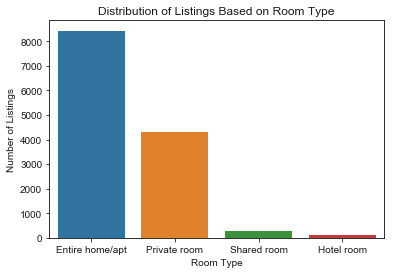

In [8]:
# Analyse distribution of listings based on room type
data['room_type'].nunique()
sns.countplot(data=data, x="room_type")
plt.title('Distribution of Listings Based on Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

**Insights**: As we can observe from the plot, most of the listings are entire home/apartment followed by private room, which is almost as twice as entire home/apartment. <br>Interest in Shared room and hotel room are quite low, and thus will not contribute much in the analysis.

### Drop shared and hotel room

In [9]:
data = data[(data.room_type != 'Shared room') & (data.room_type != 'Hotel room')]
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,148,2023-05-25,0.85,1,123,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.08,1,137,0,03/Z/RA/003410-18


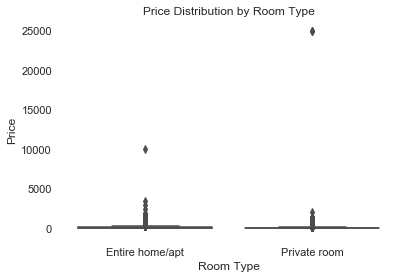

In [10]:
# Analyse the price based on room type
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

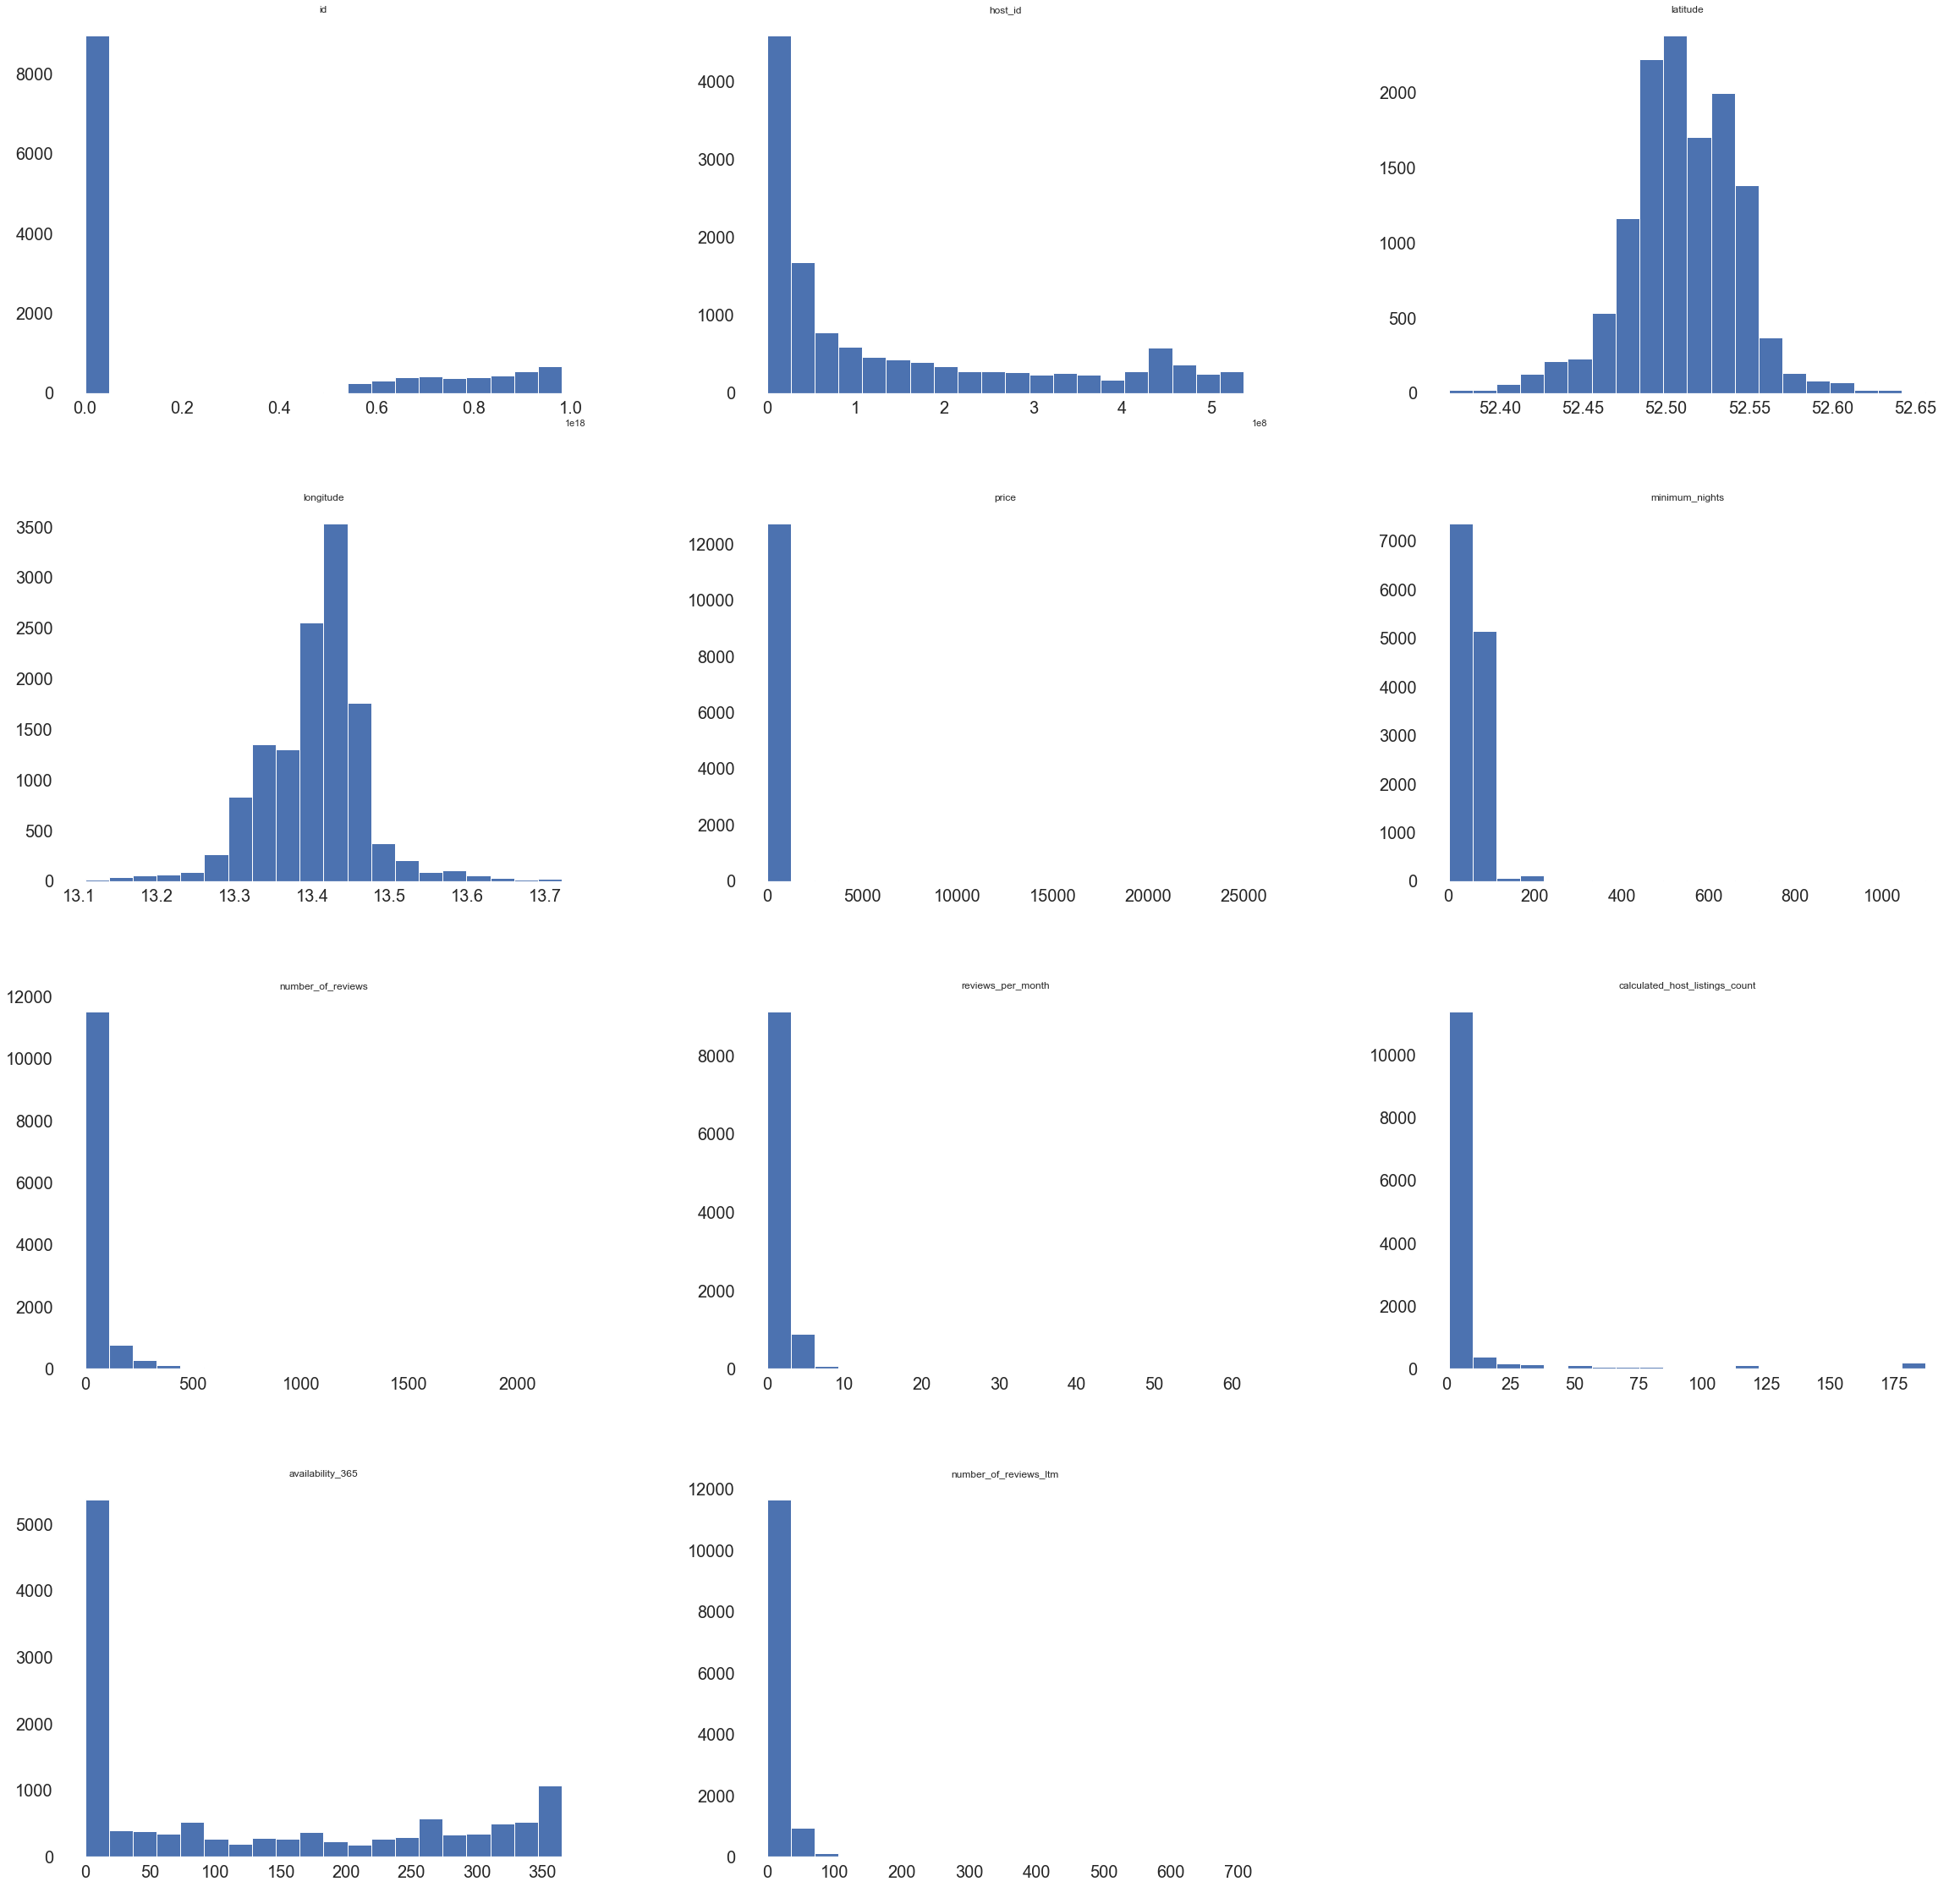

In [11]:
data.hist(bins=20, xlabelsize=20, ylabelsize=20, figsize=(40,40));

## Data Visualization
- Scatter plot showing the neighbourhood group based on latitude and longitude 
- It helps us understand better how different neighbout groups are distributed across Berlin and the its landscape.
- It serves as a valuable input for further correlation analysis.

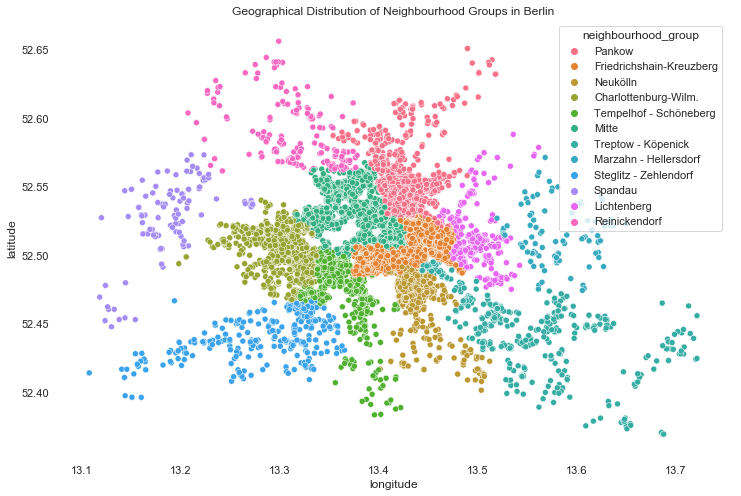

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.neighbourhood_group)
plt.title("Geographical Distribution of Neighbourhood Groups in Berlin")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

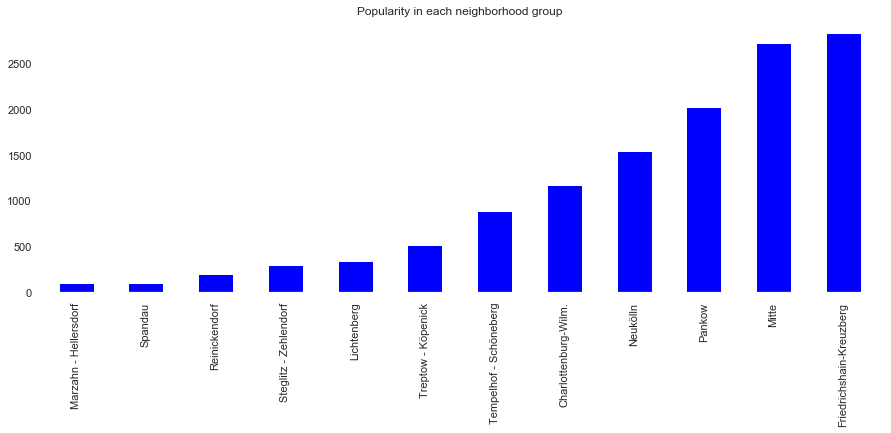

In [13]:
neighbourhood = data.neighbourhood_group.value_counts()
from collections import Counter
count = Counter(data['neighbourhood_group'])
count_data = pd.DataFrame.from_dict(count, orient='index').sort_values(by=0)

count_data


fig = count_data.plot(kind='bar', 
           color = 'blue', 
           figsize =(15,5), 
           title = 'Popularity in each neighborhood group',
           legend = False)

fig

In [14]:
mean = neighbourhood.mean()
mean
print(f"Mean Count in Neighbourhood Group: {mean}")
highest_count_group = neighbourhood.idxmax()
highest_count_group

Mean Count in Neighbourhood Group: 1061.6666666666667


'Friedrichshain-Kreuzberg'

## Expensive neighbourhood

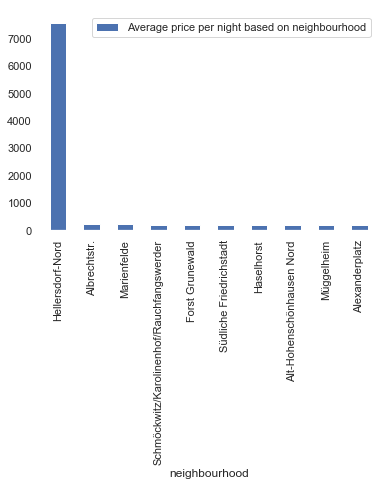

,Average price per night based on neighbourhood
neighbourhood,
Hellersdorf-Nord,7557.300000
Albrechtstr.,230.836066
Marienfelde,215.000000
Schmöckwitz/Karolinenhof/Rauchfangswerder,203.130435
Forst Grunewald,192.000000
Südliche Friedrichstadt,188.250000
Haselhorst,187.250000
Alt-Hohenschönhausen Nord,180.900000
Müggelheim,176.333333


In [15]:
# Top 10 most expensive locality in Airbnb listing
df = data.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                            ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(10)
df.plot(kind='bar')
plt.show()
pd.DataFrame(df)

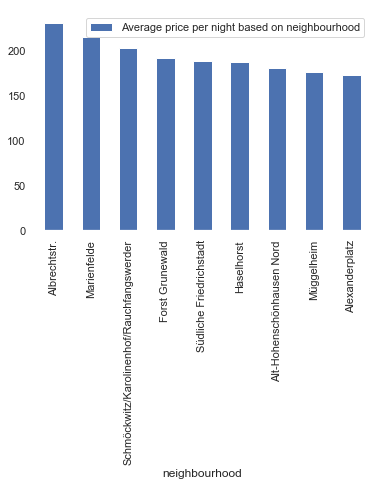

,Average price per night based on neighbourhood
neighbourhood,
Albrechtstr.,230.836066
Marienfelde,215.000000
Schmöckwitz/Karolinenhof/Rauchfangswerder,203.130435
Forst Grunewald,192.000000
Südliche Friedrichstadt,188.250000
Haselhorst,187.250000
Alt-Hohenschönhausen Nord,180.900000
Müggelheim,176.333333
Alexanderplatz,173.224516


In [16]:
# Drop if average price per night based on neightbourhood is greater than 7000
df = data.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
      ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(10)

df_new = (df[(df['Average price per night based on neighbourhood']<7000)])
df_new.plot(kind='bar')
plt.show()
pd.DataFrame(df_new)

## Outlier 
- Get statistics of data

In [17]:
data.price.describe()

count    12740.000000
mean       121.774254
std        409.678358
min          8.000000
25%         50.000000
50%         85.000000
75%        140.250000
max      24999.000000
Name: price, dtype: float64

In [18]:
min_thresold, max_thresold = data.price.quantile([0.01,0.999])
min_thresold, max_thresold

(18.0, 1424.2610000000022)

In [19]:
df2 = data[(data.price>min_thresold)&(data.price<max_thresold)]
df2.shape
df2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534710,13.418100,Entire home/apt,83,63,148,2023-05-25,0.85,1,123,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.532690,13.418050,Entire home/apt,180,6,8,2020-01-04,0.08,1,137,0,03/Z/RA/003410-18
2,14325,Rental unit in Berlin · ★4.67 · Studio · 1 bed...,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.548130,13.403660,Entire home/apt,70,150,26,2021-06-21,0.16,4,288,0,NaN
3,16644,Condo in Berlin · ★4.72 · 1 bedroom · 1 bed · ...,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.503120,13.435080,Entire home/apt,90,93,48,2017-12-14,0.30,2,131,0,NaN
4,30295,Rental unit in Berlin · ★4.79 · 2 bedrooms · 4...,485838,Michele,Pankow,Helmholtzplatz,52.545960,13.422910,Entire home/apt,126,4,401,2023-09-12,2.53,4,280,41,First name and Last name: Michele Fossi (mich...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13129,980347234223276486,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,490320164,Duc,Mitte,Alexanderplatz,52.525075,13.397357,Entire home/apt,100,1,0,NaN,NaN,8,238,0,Legal entity name and Legal form: Irent berlin...
13130,980356275147560933,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,490320164,Duc,Pankow,Helmholtzplatz,52.545251,13.415096,Entire home/apt,90,5,0,NaN,NaN,8,16,0,Legal entity name and Legal form: Irent Berlin...
13131,980363262097573137,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,490320164,Duc,Mitte,Brunnenstr. Süd,52.537745,13.396726,Entire home/apt,95,5,0,NaN,NaN,8,25,0,Legal entity name and Legal form: Irent Berlin...
13132,980607121480836869,Rental unit in Berlin · ★New · 2 bedrooms · 2 ...,332391440,Andréia,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.501853,13.414776,Entire home/apt,130,3,0,NaN,NaN,1,262,0,03/Z/AZ/005831-22


## Explore Relationships

In [20]:
from ipywidgets import interactive
# Set the figure size
plt.figure(figsize=(40, 40))
def size_widget(height = 5, aspect=2):

    sns.pairplot(df2[['room_type','price','minimum_nights', 'number_of_reviews', 'availability_365']], hue ='room_type', height = height, aspect = aspect)

<Figure size 2880x2880 with 0 Axes>

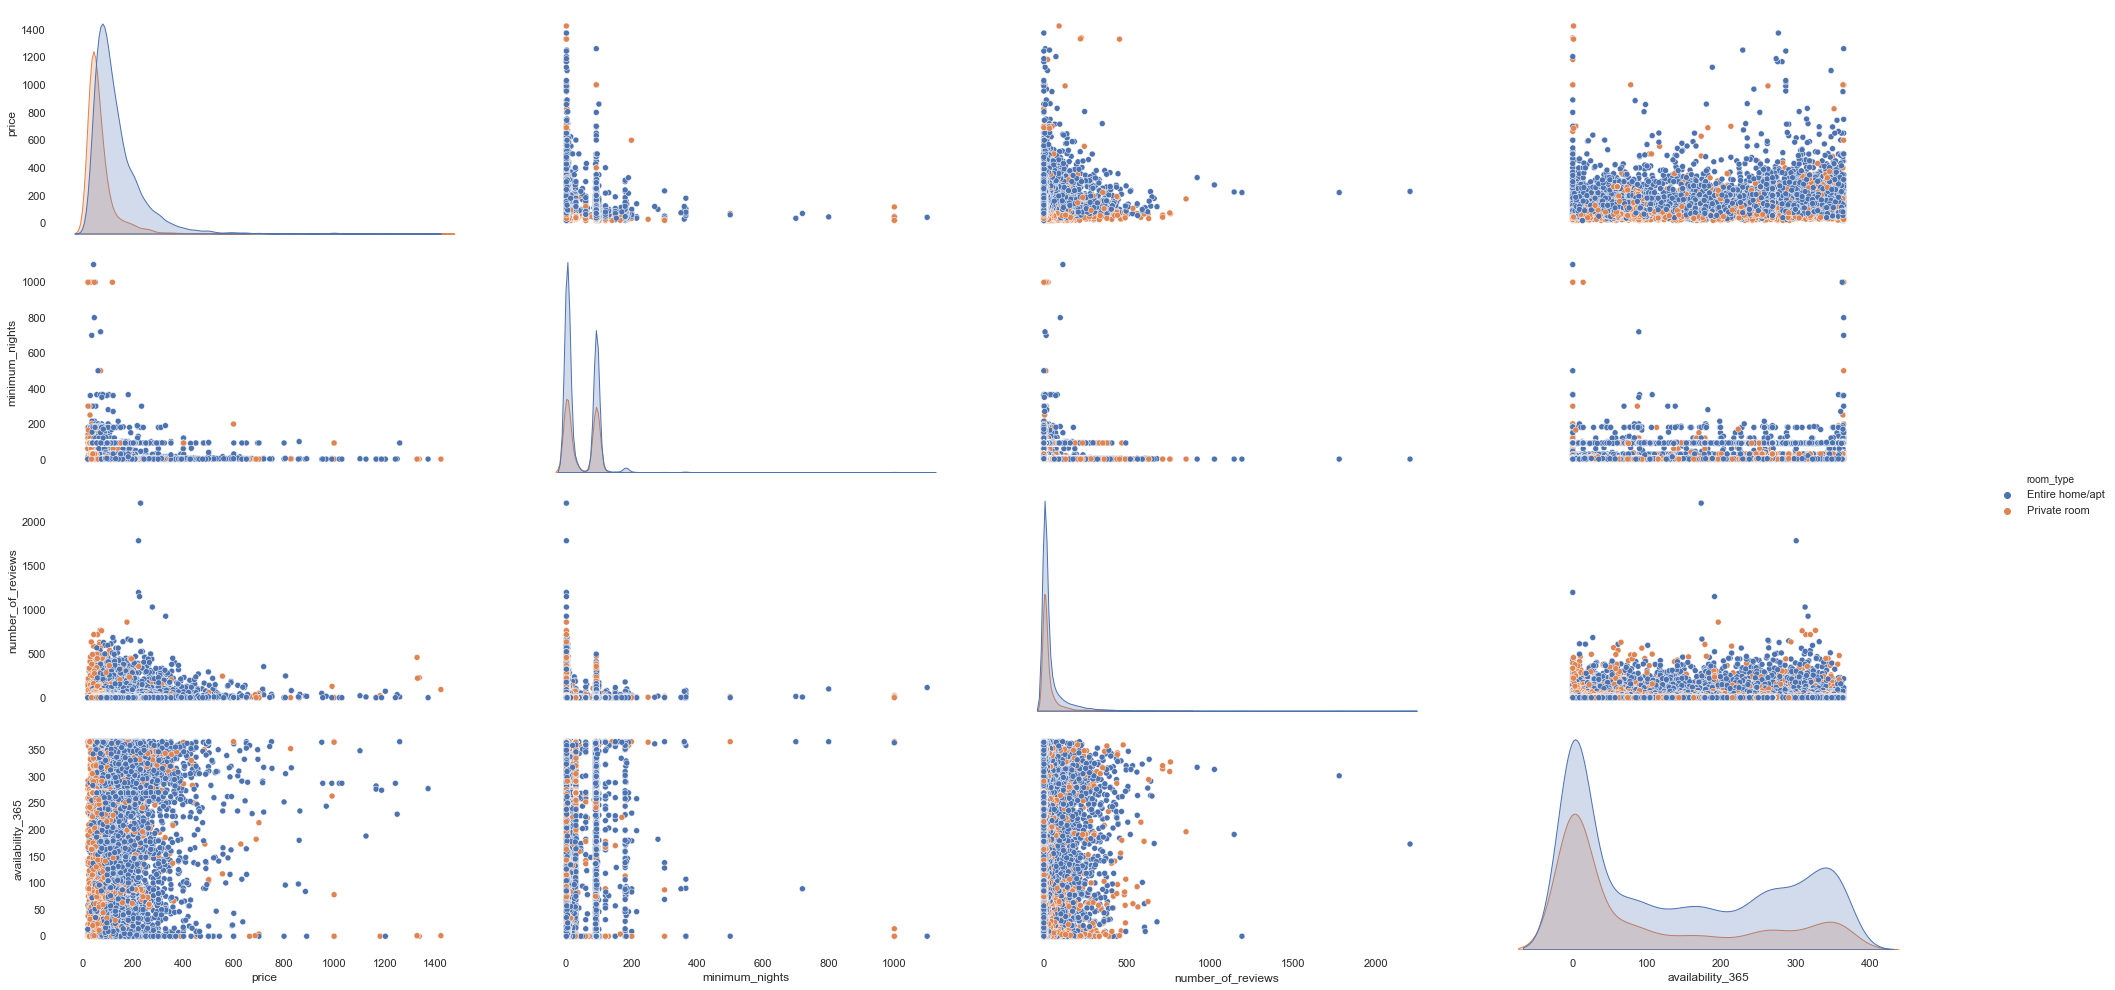

In [21]:
interactive(size_widget, height= (1, 3.5, 0.5), aspect = (0.5, 2, 0.25))

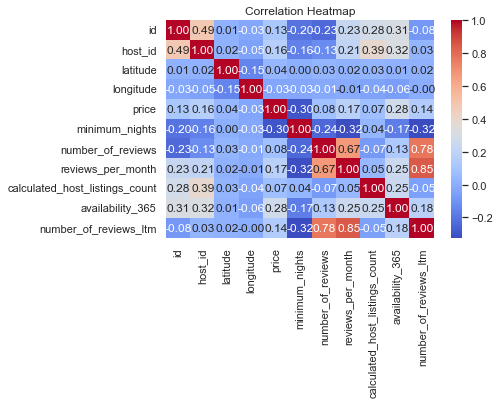

In [22]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

'Price' has higher coefficient of correlation with availability_365, reviews_per_month, host_id, and number_of_reviews_itm. 
<br> However, availability_365 has higher coefficient of correlation with host_id, id, and price, reviews_per_month, calculated_host_listings_count, and number_of_reviews_itm.
<br> Reviews_per_month and number_of_reviews_itm are highly correlated.

Text(0.5,1,'Distribution of price')

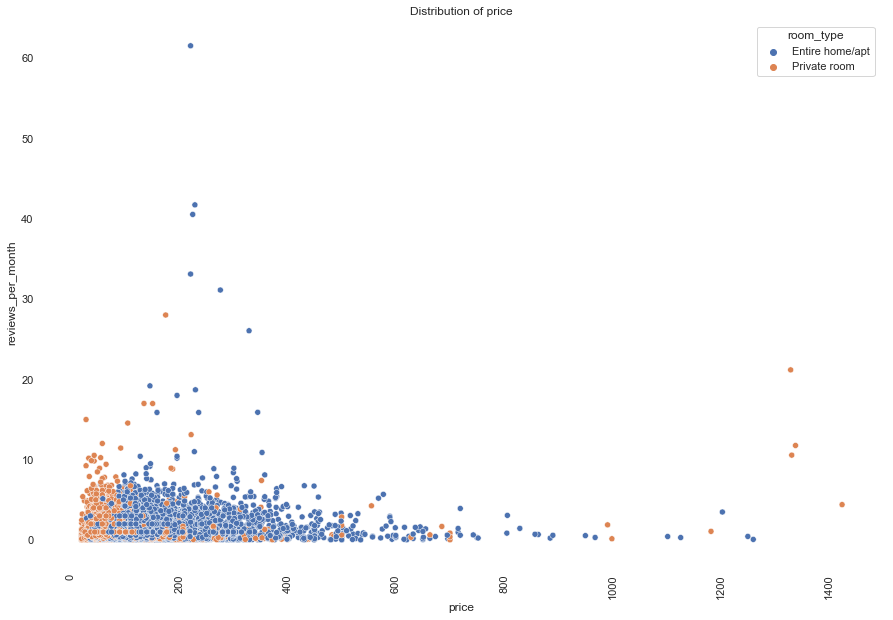

In [23]:
plt.figure(figsize=(15, 10));
sns.scatterplot(x='price', y='reviews_per_month', hue='room_type', data= df2);
plt.xticks(rotation='vertical');
plt.title('Distribution of price')

## Feature Engineering

- Let's now look at 'name' column. It looks like this- 'Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 beds · 2.5 baths'

In [24]:
# Extract only rating from the name column
data['rating'] = data['name'].str.extract('★(\\d+\\.?\\d*)').astype(float)
data['rating']

0        4.63
1        5.00
2        4.67
3        4.72
4        4.79
         ... 
13129     NaN
13130     NaN
13131     NaN
13132     NaN
13133     NaN
Name: rating, Length: 12740, dtype: float64

In [25]:
# Extract only number of bedrooms 
data['num_bedrooms'] = data['name'].str.extract('(\\d+) bedroom').astype(float)
data['num_bedrooms'].dropna()

0        1.0
1        4.0
3        1.0
4        2.0
6        2.0
        ... 
13129    1.0
13130    1.0
13131    1.0
13132    2.0
13133    1.0
Name: num_bedrooms, Length: 11771, dtype: float64

In [26]:
# Extract only number of bedrooms 
data['num_beds'] = data['name'].str.extract('(\\d+) beds').astype(float)
data['num_beds'].dropna()

0        2.0
1        7.0
4        4.0
6        2.0
8        2.0
        ... 
13116    8.0
13124    3.0
13125    3.0
13126    2.0
13132    2.0
Name: num_beds, Length: 5383, dtype: float64

In [27]:
# Extract only number of bedrooms 
data['num_baths'] = data['name'].str.extract('(\\d+) baths').astype(float)
data['num_baths'].dropna()

1        5.0
11       2.0
16       2.0
21       2.0
24       2.0
        ... 
13070    5.0
13071    5.0
13080    5.0
13085    2.0
13126    2.0
Name: num_baths, Length: 1630, dtype: float64

In [28]:
data.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,num_bedrooms,num_beds,num_baths
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.532690,13.418050,Entire home/apt,180,...,2020-01-04,0.08,1,137,0,03/Z/RA/003410-18,5.00,4.0,7.0,5.0
16,26543,Rental unit in Berlin · ★4.65 · 2 bedrooms · 4...,112675,Terri,Pankow,Helmholtzplatz,52.544190,13.419560,Entire home/apt,280,...,2023-07-29,1.27,1,0,7,03/Z/RA/005604-20,4.65,2.0,4.0,2.0
21,47938,Rental unit in Berlin · ★5.0 · 2 bedrooms · 3 ...,218479,Laura,Pankow,Prenzlauer Berg Südwest,52.531970,13.419940,Entire home/apt,169,...,2020-07-20,0.25,1,0,0,03/Z/RA/003442-18,5.00,2.0,3.0,2.0
24,57049,Rental unit in Berlin · ★4.92 · 2 bedrooms · 3...,54283,Marine,Pankow,Prenzlauer Berg Nordwest,52.547580,13.406320,Entire home/apt,280,...,2023-08-16,0.80,3,171,12,03/Z/RA/003544-18,4.92,2.0,3.0,2.0
27,64014,Rental unit in Berlin · ★4.75 · 2 bedrooms · 2...,312896,Stephan,Mitte,Brunnenstr. Nord,52.540590,13.403010,Entire home/apt,179,...,2023-07-29,0.11,1,15,1,01/Z/RA/013285-21,4.75,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,941086051474266293,Rental unit in Berlin · ★4.33 · 1 bedroom · 2 ...,527213604,Midhun,Mitte,Wedding Zentrum,52.543622,13.360330,Entire home/apt,36,...,2023-09-12,3.00,1,72,3,First name and Last name: Midhun Mosess <br/> ...,4.33,1.0,2.0,5.0
12454,938166309938497928,Rental unit in Berlin · ★5.0 · 4 bedrooms · 4 ...,721022,Mia,Mitte,Alexanderplatz,52.522133,13.384257,Entire home/apt,313,...,2023-08-27,2.86,6,216,4,Legal entity name and Legal form: Eurinvest SA...,5.00,4.0,4.0,2.0
12612,950540608055397350,Rental unit in Berlin · ★5.0 · 3 bedrooms · 4 ...,490842329,Nancy,Spandau,Hakenfelde,52.558577,13.195167,Entire home/apt,260,...,2023-09-10,4.00,1,253,4,05/Z/RA/010957-23,5.00,3.0,4.0,2.0
12690,954898531626857322,Rental unit in Berlin · ★4.75 · 2 bedrooms · 2...,531022489,Yücel,Mitte,Alexanderplatz,52.512369,13.415341,Entire home/apt,284,...,2023-08-29,3.75,1,35,4,01/Z/RA/015694-23,4.75,2.0,2.0,2.0
